#01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#02. Import Data

In [2]:
path = r'/Users/golde/Instacart Basket Analysis/'

In [3]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_updated3.pkl'))

#03. Create Visualizations

<AxesSubplot:>

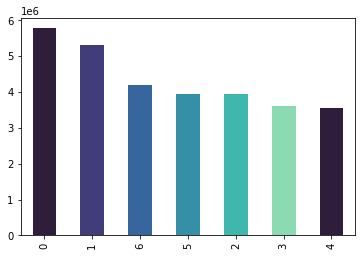

In [10]:
#Bar Graph
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color=sns.color_palette("mako"))

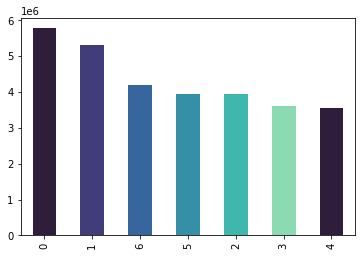

In [11]:
bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color=sns.color_palette("mako"))

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

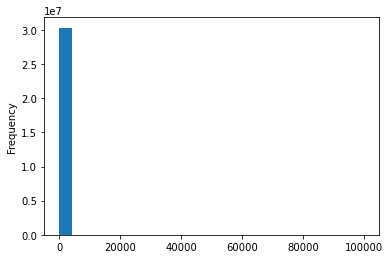

In [13]:
#Histogram
ords_prods_merged['prices'].plot.hist(bins = 25)

In [15]:
ords_prods_merged['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
ords_prods_merged['prices'].mean()

11.97724944163494

In [18]:
ords_prods_merged['prices'].median()

7.4

In [19]:
ords_prods_merged['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

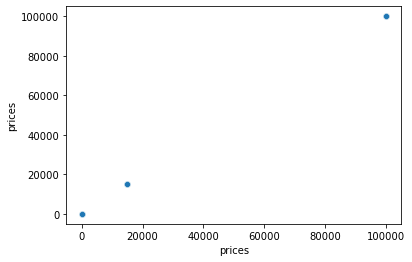

In [20]:
#scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [21]:
#check outliers
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income,merged
7227,1435153,1519,26,2,11,6.0,21553,15,0,both,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7228,1066435,1519,32,3,10,5.0,21553,28,1,both,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
11909,1697208,2409,33,1,19,5.0,21553,1,0,both,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
16553,965345,3531,27,2,19,8.0,33664,2,0,both,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
18710,172425,3819,3,1,12,30.0,21553,14,0,both,...,Gregory,Cabrera,Male,Utah,69,1/26/2020,2,married,129749,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221298,1226705,39667,7,2,15,20.0,33664,14,0,both,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
30237631,3000037,95105,2,4,19,22.0,33664,4,0,both,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both
30237632,2741225,95105,4,5,12,2.0,33664,3,1,both,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both
30240900,1179092,131671,12,4,9,15.0,33664,1,0,both,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both


In [22]:
#turn outliers to NaN
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [23]:
ords_prods_merged['prices'].max()

25.0

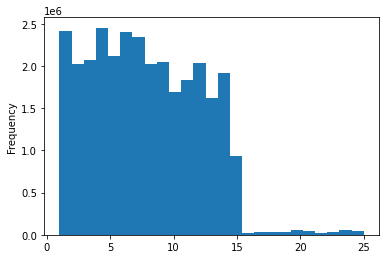

In [24]:
hist = ords_prods_merged['prices'].plot.hist(bins = 25)

In [46]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

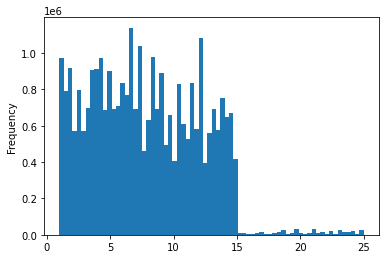

In [25]:
hist2 = ords_prods_merged['prices'].plot.hist(bins = 70)

In [47]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices2.png'))

In [26]:
#Line Chart
df = ords_prods_merged[:2000000]

In [28]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True, False,  True])

In [30]:
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [32]:
big = ords_prods_merged[dev]
small = ords_prods_merged[~dev]

In [33]:
#Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [34]:
#Store 70% of sample in dataframe big
big = ords_prods_merged[dev]

In [35]:
#Store 30% of sample in dataframe small
small = ords_prods_merged[~dev]

In [36]:
#check results 
len(ords_prods_merged)

30328763

In [37]:
len(big) + len(small)

30328763

In [38]:
#reducing size 
df_2 = small[['orders_day_of_week','prices']]

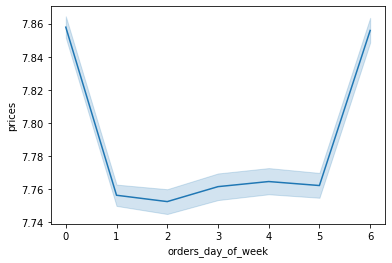

In [39]:
# Create Line Chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

#04. Visual for Hours of Day 

In [48]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_day.png'))

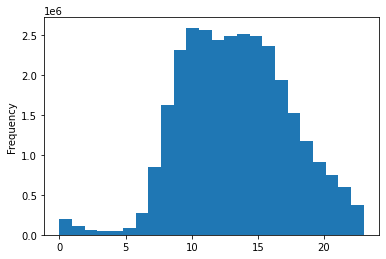

In [42]:
#Histogram for Hours_of_day_ordered
hour_hist = ords_prods_merged['hour_of_day_ordered'].plot.hist(bins = 24)

The histogram shows that most orders are between 9am and 4pm. 

In [49]:
hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_day.png'))

#05. Visual for Loyalty Flag

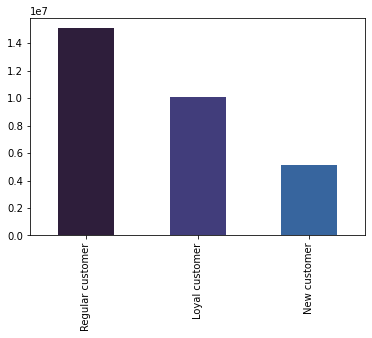

In [45]:
#Bar Graph for Loyalty Flag
loyalty_bar = ords_prods_merged['loyalty_flag'].value_counts().plot.bar(color=sns.color_palette("mako"))

In [50]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

#06. Visual for Prices/Hour of Day

In [51]:
# Line Graph for Price/Hour of Day
df1 = ords_prods_merged[:2000000]

In [52]:
np.random.seed(4)
dev1 = np.random.rand(len(ords_prods_merged)) <= 0.7

In [53]:
dev1

array([False,  True, False, ...,  True, False,  True])

In [54]:
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [55]:
big1 = ords_prods_merged[dev1]
small1 = ords_prods_merged[~dev1]

In [56]:
#Create a list holding True/False values to the test np.random.rant() <= 0.7
dev1 = np.random.rand(len(ords_prods_merged)) <= 0.7

In [57]:
#Store 70% of sample in dataframe big
big1 = ords_prods_merged[dev1]

In [58]:
#Store 30% of sample in dataframe small
small1 = ords_prods_merged[~dev1]

In [59]:
#check results 
len(ords_prods_merged)

30328763

In [60]:
len(big1) + len(small1)

30328763

In [73]:
#reducing size 
df_size = small1[['hour_of_day_ordered','prices']]

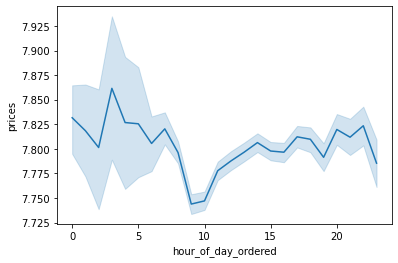

In [74]:
# Create Line Chart 
line2 = sns.lineplot(data = df_size, x = 'hour_of_day_ordered',y = 'prices')

In [75]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_hour_line.png'))

#07. Visual for Age/Family Status(dependents)

In [76]:
# Line Graph for Age/Dependents
df2 = ords_prods_merged[:2000000]

In [77]:
np.random.seed(4)
dev2 = np.random.rand(len(ords_prods_merged)) <= 0.7

In [78]:
dev2

array([False,  True, False, ...,  True, False,  True])

In [79]:
np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [80]:
big2 = ords_prods_merged[dev2]
small2 = ords_prods_merged[~dev2]

In [81]:
#Create a list holding True/False values to the test np.random.rant() <= 0.7
dev2 = np.random.rand(len(ords_prods_merged)) <= 0.7

In [82]:
#Store 70% of sample in dataframe big
big2 = ords_prods_merged[dev2]

In [83]:
#Store 30% of sample in dataframe small
small2 = ords_prods_merged[~dev2]

In [84]:
#check results 
len(ords_prods_merged)

30328763

In [85]:
len(big2) + len(small2)

30328763

In [86]:
#reducing size 
df_s = small2[['age','dependents']]

In [101]:
ords_prods_merged['age'].describe()

count    3.032876e+07
mean     4.946447e+01
std      1.848533e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

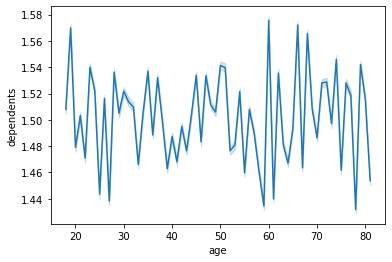

In [102]:
# Create Line Chart 
line3 = sns.lineplot(data = ords_prods_merged, x = 'age',y = 'dependents')

The graph shows dependents are all over the place. So I created a scatterplot below, which shows no correlation. 

<AxesSubplot:xlabel='age', ylabel='dependents'>

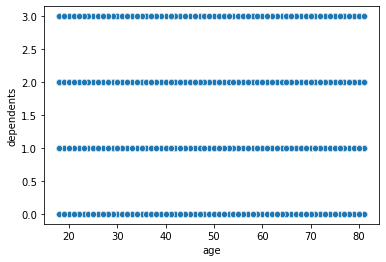

In [103]:
sns.scatterplot(x = 'age', y = 'dependents',data = ords_prods_merged)

In [104]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependent_line.png'))

#08. Visual for Age & Spending Power

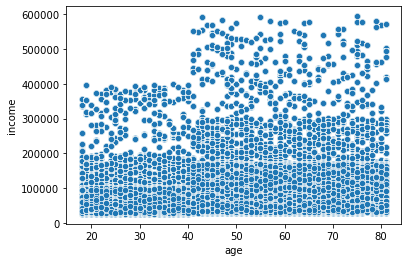

In [105]:
#Scatterplot Age vs Spending Power
age_income_scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_merged)

Around age 40, the income goes up. 

In [106]:
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter.png'))